# Deep Learning Assignment 3
### Pritika Ramu 2019A7PS1140P
In this assignment, we perform image matching using some popular methods like SIFT, SURF, ArcFace, ORB, AKAZE, BRISK and SSIM. 

In [ ]:
!pip uninstall opencv-python
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 26 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def img_enhance(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    clahe = cv2.createCLAHE(clipLimit=5.0)
    img = clahe.apply(img)
    return img

In [ ]:
def calc_scores(thresh, genuine, imposter):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for g in genuine:
        if g < thresh:
            fn += 1
        else:
            tp += 1
    
    for i in imposter:
        if i < thresh:
            tn += 1
        else:
            fp += 1
    return (tp+tn)/(tp+tn+fp+fn), fp/(fp+tn), fn/(fn+tp)

In [ ]:
threshes = np.arange(0, 1, 0.0001).tolist()

# SIFT

In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_SIFT.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    img1 = cv2.imread(img1)
    img1 = img_enhance(img1)
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
           str2 = str(image)
           if (str1.split("_")[2]==str2.split("_")[2]):
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               img2 = img_enhance(img2)
               kp2, des2 = sift.detectAndCompute(img2,None)
          
               if des1 is None:
                 file1.write( str1 + " " + str2 + " " + "0" +"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
               if des2 is None:
                 file1.write( str1 + " " + str2 + " " + "0"+"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
               matches = bf.knnMatch(des1,des2, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) <= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good = []
               try:
                 for m,n in matches:
                     if m.distance < 0.9*n.distance:
                         good.append([m])
               except:
                 pass 
               score = len(good) / number_keypoints
               if(score>1):
                 file1.write( str1 + " " + str2 + " " + "1.0"+"\n")
                 print(str1 + " " + str2 + " " + "1.0")
               else:
                 file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                 print(str1 + " " + str2 + " " + str(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.22302158273381295
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.2014388489208633
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.23741007194244604
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.17266187050359713
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.17985611510791366
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.15827338129496402
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.15827338129496402
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.1079136690647482
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.18705035971223022
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.17266187050359713
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.20863309352517986
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.2302158273381295
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.17266187050359713
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.1366906474820144
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.18705035971223022
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.2158273381294964
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.20863309352517986
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.1510791366906475
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.19424460431654678
26_P2_S1_1.jpg 10_P

In [ ]:
file1.close()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_SIFT.csv", header=None)
df

0
0        1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.15942028985507245
1         1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.1642512077294686
2        1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.11594202898550725
3        1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.13526570048309178
4        1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.17391304347826086
...                                                  ...
56443   28_P2_S2_3.jpg 28_P1_S1_2.jpg 0.5668449197860963
56444  28_P2_S2_3.jpg 28_P1_S1_3.jpg 0.21468926553672316
56445  28_P2_S2_3.jpg 28_P2_S1_1.jpg 0.21896162528216703
56446  28_P2_S2_3.jpg 28_P2_S1_2.jpg 0.21553884711779447
56447   28_P2_S2_3.jpg 28_P2_S1_3.jpg 0.2111368909512761

[56448 rows x 1 columns]

In [ ]:
genuine = []
imposter = []

In [ ]:
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(float(str1[2]))
  else:
    imposter.append(float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.22302158273381295
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.2014388489208633
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.23741007194244604
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.17266187050359713
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.17985611510791366
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.15827338129496402
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.15827338129496402
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.1079136690647482
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.18705035971223022
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.17266187050359713
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.20863309352517986
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.2302158273381295
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.17266187050359713
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.1366906474820144
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.18705035971223022
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.2158273381294964
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.20863309352517986
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.1510791366906475
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.19424460431654678
26_P2_S1_1.jpg 10_P

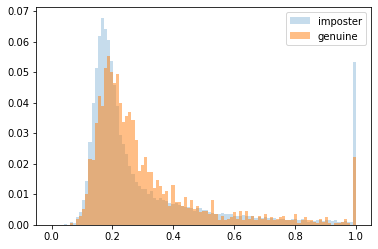

In [ ]:
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

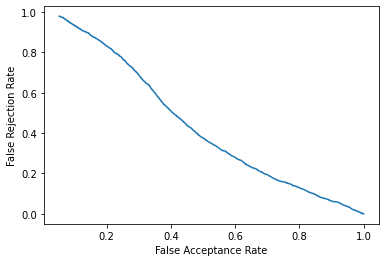

eer_diff= 0.00031231628453848304  eer_thresh= 0.2272


In [ ]:
scores_sift = {}
crr_sift = []
far_sift = []
frr_sift = []
eer_thresh_sift = 1000
eer_diff_sift = 1000
crrSift = 10000
for thresh in threshes:
    scores_sift[thresh] = calc_scores(thresh, genuine, imposter)
    crr_sift.append(scores_sift[thresh][0])
    far_sift.append(scores_sift[thresh][1])
    frr_sift.append(scores_sift[thresh][2])
    if(abs(scores_sift[thresh][1]-scores_sift[thresh][2])<eer_diff_sift):
      eer_diff_sift = abs(scores_sift[thresh][1]-scores_sift[thresh][2])
      eer_thresh_sift = thresh
      crrSift = scores_sift[thresh][0]
plt.plot(far_sift, frr_sift)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_sift," eer_thresh=",eer_thresh_sift)

In [ ]:
crrSift

0.553766298185941

# SURF

In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_SURF.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
surf = cv2.xfeatures2d.SURF_create(400)
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    img1 = img_enhance(img1)
    kp1, des1 = surf.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
           str2 = str(image)
           if (str1.split("_")[2]==str2.split("_")[2]):
               #print(str1.split("_"))
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               img2 = img_enhance(img2)
               kp2, des2 = surf.detectAndCompute(img2,None)
          
               if des1 is None:
                 file1.write( str1 + " " + str2 + " " + "0" +"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
               if des2 is None:
                 file1.write( str1 + " " + str2 + " " + "0"+"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
              #  print(des1)
              #  print(des2)
              #  print(type(des1),type(des2))
               matches = bf.knnMatch(des1,des2, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) <= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good = []
               #print(matches)
               try:
                 for m,n in matches:
                     if m.distance < 0.9*n.distance:
                         good.append([m])
               except:
                 pass 
               score = len(good) / number_keypoints
               if(score>1):
                 file1.write( str1 + " " + str2 + " " + "1.0"+"\n")
                 print(str1 + " " + str2 + " " + "1.0")
               else:
                 file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                 print(str1 + " " + str2 + " " + str(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.23076923076923078
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.11538461538461539
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.23076923076923078
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.34615384615384615
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.2692307692307692
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.23076923076923078
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.3076923076923077
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.4230769230769231
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.2692307692307692
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.2692307692307692
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.23076923076923078
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.15384615384615385
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.3076923076923077
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.2692307692307692
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.38461538461538464
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.34615384615384615
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.15384615384615385
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.3076923076923077
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.23076923076923078
26_P2_S1_1.jpg 10_P2_

In [ ]:
file1.close()
genuine = []
imposter = []
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_SURF.csv", header=None)
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(float(str1[2]))
  else:
    imposter.append(float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.23076923076923078
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.11538461538461539
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.23076923076923078
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.34615384615384615
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.2692307692307692
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.23076923076923078
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.3076923076923077
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.4230769230769231
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.2692307692307692
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.2692307692307692
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.23076923076923078
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.15384615384615385
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.3076923076923077
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.2692307692307692
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.38461538461538464
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.34615384615384615
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.15384615384615385
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.3076923076923077
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.23076923076923078
26_P2_S1_1.jpg 10_P2_

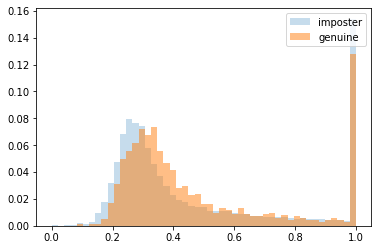

In [ ]:
bins = np.linspace(0, 1, 50)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

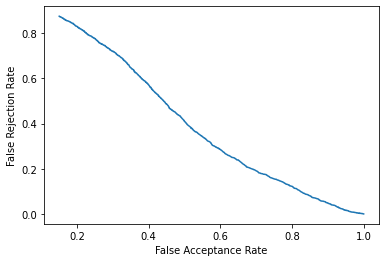

eer_diff= 0.0002939447383892291  eer_thresh= 0.3572


In [ ]:
scores_surf = {}
crr_surf = []
far_surf = []
frr_surf = []
eer_thresh_surf = 1000
eer_diff_surf = 1000
crrSurf = 1000
for thresh in threshes:
    scores_surf[thresh] = calc_scores(thresh, genuine, imposter)
    crr_surf.append(scores_surf[thresh][0])
    far_surf.append(scores_surf[thresh][1])
    frr_surf.append(scores_surf[thresh][2])
    if(abs(scores_surf[thresh][1]-scores_surf[thresh][2])<eer_diff_surf):
      eer_diff_surf = abs(scores_surf[thresh][1]-scores_surf[thresh][2])
      eer_thresh_surf = thresh
      crrSurf = scores_surf[thresh][0]
plt.plot(far_surf, frr_surf)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_surf," eer_thresh=",eer_thresh_surf)

In [ ]:
crrSurf

0.5374858276643991

# ArcFace

In [ ]:
!pip install arcface

     |████████████████████████████████| 62 kB 752 kB/s 
     |████████████████████████████████| 596 kB 14.0 MB/s 
     |████████████████████████████████| 49.9 MB 15 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from arcface import ArcFace
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_arcface.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
arcface = ArcFace.ArcFace()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    if str1=='.ipynb_checkpoints':
        continue
    img1 = os.path.join(path1, images)
    img1 = cv2.imread(img1)
    emb1 = arcface.calc_emb(img1)
    if len(emb1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
           str2 = str(image)
           if str1 == '.ipynb_checkpoints' or str2 == '.ipynb_checkpoints':
               continue
           if (str1.split("_")[2]==str2.split("_")[2]):
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               emb2 = arcface.calc_emb(img2)
          
               if emb1 is None:
                 file1.write(str1 + " " + str2 + " " + str(0)+"\n")
                 print(str1 + " " + str2 + " " + str(0))
                 continue
               if emb2 is None:
                 file1.write(str1 + " " + str2 + " " + str(0)+"\n")
                 print(str1 + " " + str2 + " " + str(0))
                 continue
               dist = distance.cosine(emb1, emb2)
               file1.write(str1 + " " + str2 + " " + str(dist)+"\n")
               print(str1 + " " + str2 + " " + str(dist))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.39198625087738037
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.29351699352264404
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.44776439666748047
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.42918699979782104
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.5259577929973602
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.45436710119247437
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.3823009729385376
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.41843587160110474
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.22353845834732056
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.2756948471069336
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.18909227848052979
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.33241283893585205
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.24003583192825317
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.29121124744415283
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.21197092533111572
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.1970357894897461
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.21984708309173584
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.28925442695617676
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.28476572036743164
26_P2_S1_1.jpg 10

In [ ]:
file1.close()

In [ ]:
genuine = []
imposter = []
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_arcface.csv", header=None)
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(1-float(str1[2]))
  else:
    imposter.append(1-float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.39198625087738037
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.29351699352264404
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.44776439666748047
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.42918699979782104
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.5259577929973602
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.45436710119247437
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.3823009729385376
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.41843587160110474
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.22353845834732056
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.2756948471069336
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.18909227848052979
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.33241283893585205
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.24003583192825317
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.29121124744415283
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.21197092533111572
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.1970357894897461
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.21984708309173584
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.28925442695617676
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.28476572036743164
26_P2_S1_1.jpg 10

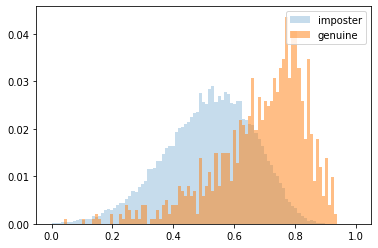

In [ ]:
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

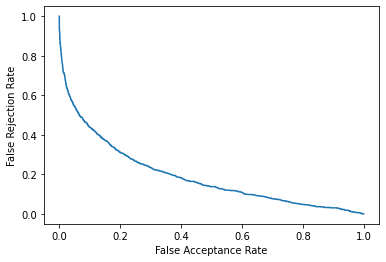

eer_diff= 3.674309229867445e-05  eer_thresh= 0.619


In [ ]:
scores_arc = {}
crr_arc = []
far_arc = []
frr_arc = []
eer_thresh_arc = 1000
eer_diff_arc = 1000
crrArc = 0
for thresh in threshes:
    scores_arc[thresh] = calc_scores(thresh, genuine, imposter)
    crr_arc.append(scores_arc[thresh][0])
    far_arc.append(scores_arc[thresh][1])
    frr_arc.append(scores_arc[thresh][2])
    if(abs(scores_arc[thresh][1]-scores_arc[thresh][2])<eer_diff_arc):
      eer_diff_arc = abs(scores_arc[thresh][1]-scores_arc[thresh][2])
      eer_thresh_arc = thresh
      crrArc = scores_arc[thresh][0]
plt.plot(far_arc, frr_arc)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_arc," eer_thresh=",eer_thresh_arc)

In [ ]:
crrArc

0.7401147959183674

# ORB

In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_orb.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
orb = cv2.ORB_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    img1 = img_enhance(img1)
    kp1, des1 = orb.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
           str2 = str(image)
           if (str1.split("_")[2]==str2.split("_")[2]):
               #print(str1.split("_"))
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               img2 = img_enhance(img2)
               kp2, des2 = orb.detectAndCompute(img2,None)
          
               if des1 is None:
                 file1.write( str1 + " " + str2 + " " + "0" +"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
               if des2 is None:
                 file1.write( str1 + " " + str2 + " " + "0"+"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
              #  print(des1)
              #  print(des2)
              #  print(type(des1),type(des2))
               matches = bf.knnMatch(des1,des2, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) <= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good = []
               #print(matches)
               try:
                 for m,n in matches:
                     if m.distance < 0.9*n.distance:
                         good.append([m])
               except:
                 pass 
               score = len(good) / number_keypoints
               if(score>1):
                 file1.write( str1 + " " + str2 + " " + "1.0"+"\n")
                 print(str1 + " " + str2 + " " + "1.0")
               else:
                 file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                 print(str1 + " " + str2 + " " + str(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P1_S1_2.jpg 7_P2_S2_2.jpg 0.20422535211267606
26_P1_S1_2.jpg 7_P2_S2_3.jpg 0.21830985915492956
26_P1_S1_2.jpg 8_P1_S2_1.jpg 0.183206106870229
26_P1_S1_2.jpg 8_P1_S2_2.jpg 0.1619718309859155
26_P1_S1_2.jpg 8_P1_S2_3.jpg 0.24647887323943662
26_P1_S1_2.jpg 8_P2_S2_1.jpg 0.14084507042253522
26_P1_S1_2.jpg 8_P2_S2_2.jpg 0.2535211267605634
26_P1_S1_2.jpg 8_P2_S2_3.jpg 0.19014084507042253
26_P1_S1_2.jpg 9_P1_S2_1.jpg 0.2535211267605634
26_P1_S1_2.jpg 9_P1_S2_2.jpg 0.22535211267605634
26_P1_S1_2.jpg 9_P1_S2_3.jpg 0.16901408450704225
26_P1_S1_2.jpg 9_P2_S2_1.jpg 0.21830985915492956
26_P1_S1_2.jpg 9_P2_S2_2.jpg 0.23943661971830985
26_P1_S1_2.jpg 9_P2_S2_3.jpg 0.22535211267605634
26_P1_S1_2.jpg 10_P1_S2_1.jpg 0.24647887323943662
26_P1_S1_2.jpg 10_P1_S2_2.jpg 0.18309859154929578
26_P1_S1_2.jpg 10_P1_S2_3.jpg 0.19718309859154928
26_P1_S1_2.jpg 10_P2_S2_1.jpg 0.176056338028169
26_P1_S1_2.jpg 10_P2_S2_2.jpg 0.13380281690140844
26_P1_S1_2.jpg 10_P2

In [ ]:
file1.close()
genuine = []
imposter = []
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_orb.csv", header=None)
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(float(str1[2]))
  else:
    imposter.append(float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P1_S1_2.jpg 7_P2_S2_2.jpg 0.20422535211267606
26_P1_S1_2.jpg 7_P2_S2_3.jpg 0.21830985915492956
26_P1_S1_2.jpg 8_P1_S2_1.jpg 0.183206106870229
26_P1_S1_2.jpg 8_P1_S2_2.jpg 0.1619718309859155
26_P1_S1_2.jpg 8_P1_S2_3.jpg 0.24647887323943662
26_P1_S1_2.jpg 8_P2_S2_1.jpg 0.14084507042253522
26_P1_S1_2.jpg 8_P2_S2_2.jpg 0.2535211267605634
26_P1_S1_2.jpg 8_P2_S2_3.jpg 0.19014084507042253
26_P1_S1_2.jpg 9_P1_S2_1.jpg 0.2535211267605634
26_P1_S1_2.jpg 9_P1_S2_2.jpg 0.22535211267605634
26_P1_S1_2.jpg 9_P1_S2_3.jpg 0.16901408450704225
26_P1_S1_2.jpg 9_P2_S2_1.jpg 0.21830985915492956
26_P1_S1_2.jpg 9_P2_S2_2.jpg 0.23943661971830985
26_P1_S1_2.jpg 9_P2_S2_3.jpg 0.22535211267605634
26_P1_S1_2.jpg 10_P1_S2_1.jpg 0.24647887323943662
26_P1_S1_2.jpg 10_P1_S2_2.jpg 0.18309859154929578
26_P1_S1_2.jpg 10_P1_S2_3.jpg 0.19718309859154928
26_P1_S1_2.jpg 10_P2_S2_1.jpg 0.176056338028169
26_P1_S1_2.jpg 10_P2_S2_2.jpg 0.13380281690140844
26_P1_S1_2.jpg 10_P2

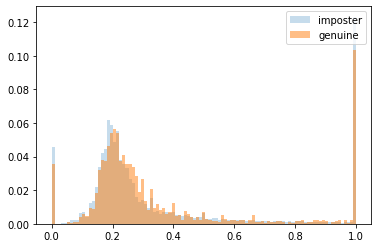

In [ ]:
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

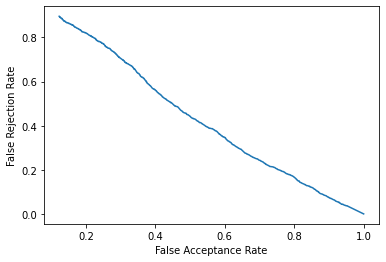

eer_diff= 0.00024465522433003706  eer_thresh= 0.23950000000000002


In [ ]:
scores_orb = {}
crr_orb = []
far_orb = []
frr_orb = []
eer_thresh_orb = 1000000000000
eer_diff_orb = 1000000000000
crrOrb = 1000
for thresh in threshes:
    scores_orb[thresh] = calc_scores(thresh, genuine, imposter)
    crr_orb.append(scores_orb[thresh][0])
    far_orb.append(scores_orb[thresh][1])
    frr_orb.append(scores_orb[thresh][2])
    if(abs(scores_orb[thresh][1]-scores_orb[thresh][2])<eer_diff_orb):
      eer_diff_orb = abs(scores_orb[thresh][1]-scores_orb[thresh][2])
      eer_thresh_orb = thresh
      crrOrb = scores_orb[thresh][0]
plt.plot(far_orb, frr_orb)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_orb," eer_thresh=",eer_thresh_orb)

In [ ]:
crrOrb

0.5282193670150988

# AKAZE

In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_akaze.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
akaze = cv2.AKAZE_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    img1 = img_enhance(img1)
    kp1, des1 = akaze.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
           str2 = str(image)
           if (str1.split("_")[2]==str2.split("_")[2]):
               #print(str1.split("_"))
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               img2 = img_enhance(img2)
               kp2, des2 = akaze.detectAndCompute(img2,None)
          
               if des1 is None:
                 file1.write( str1 + " " + str2 + " " + "0" +"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
               if des2 is None:
                 file1.write( str1 + " " + str2 + " " + "0"+"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
              #  print(des1)
              #  print(des2)
              #  print(type(des1),type(des2))
               matches = bf.knnMatch(des1,des2, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) <= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good = []
               #print(matches)
               try:
                 for m,n in matches:
                     if m.distance < 0.9*n.distance:
                         good.append([m])
               except:
                 pass 
               score = len(good) / number_keypoints
               if(score>1):
                 file1.write( str1 + " " + str2 + " " + "1.0"+"\n")
                 print(str1 + " " + str2 + " " + "1.0")
               else:
                 file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                 print(str1 + " " + str2 + " " + str(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.6666666666666666
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.6666666666666666
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.6666666666666666
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.6666666666666666
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 10_P2_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 11_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 11_P1

In [ ]:
file1.close()
genuine = []
imposter = []
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_akaze.csv", header=None)
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(float(str1[2]))
  else:
    imposter.append(float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.6666666666666666
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.6666666666666666
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.3333333333333333
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.6666666666666666
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.6666666666666666
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 10_P2_S2_3.jpg 0.3333333333333333
26_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 11_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 11_P1

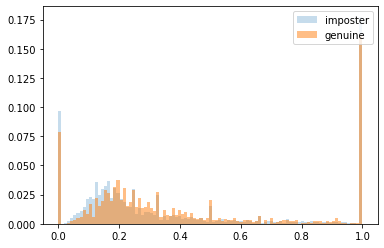

In [ ]:
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

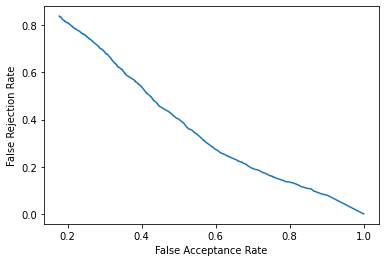

eer_diff= 0.001720912832023913  eer_thresh= 0.2501


In [ ]:
scores_akaze = {}
crr_akaze = []
far_akaze = []
frr_akaze = []
eer_thresh_akaze = 1000
eer_diff_akaze = 1000
crrAkaze = 0
for thresh in threshes:
    scores_akaze[thresh] = calc_scores(thresh, genuine, imposter)
    crr_akaze.append(scores_akaze[thresh][0])
    far_akaze.append(scores_akaze[thresh][1])
    frr_akaze.append(scores_akaze[thresh][2])
    if(abs(scores_akaze[thresh][1]-scores_akaze[thresh][2])<eer_diff_akaze):
      eer_diff_akaze = abs(scores_akaze[thresh][1]-scores_akaze[thresh][2])
      eer_thresh_akaze = thresh
      crrAkaze = scores_akaze[thresh][0]
plt.plot(far_akaze, frr_akaze)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_akaze," eer_thresh=",eer_thresh_akaze)

In [ ]:
crrAkaze

0.5486291486291486

# BRISK



In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_brisk.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
brisk = cv2.BRISK_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    img1 = img_enhance(img1)
    kp1, des1 = brisk.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
           str2 = str(image)
           if (str1.split("_")[2]==str2.split("_")[2]):
               #print(str1.split("_"))
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               img2 = img_enhance(img2)
               kp2, des2 = brisk.detectAndCompute(img2,None)
          
               if des1 is None:
                 file1.write( str1 + " " + str2 + " " + "0" +"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
               if des2 is None:
                 file1.write( str1 + " " + str2 + " " + "0"+"\n")
                 print(str1 + " " + str2 + " " + str(score))
                 continue
              #  print(des1)
              #  print(des2)
              #  print(type(des1),type(des2))
               matches = bf.knnMatch(des1,des2, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) <= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good = []
               #print(matches)
               try:
                 for m,n in matches:
                     if m.distance < 0.9*n.distance:
                         good.append([m])
               except:
                 pass 
               score = len(good) / number_keypoints
               if(score>1):
                 file1.write( str1 + " " + str2 + " " + "1.0"+"\n")
                 print(str1 + " " + str2 + " " + "1.0")
               else:
                 file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                 print(str1 + " " + str2 + " " + str(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.0625
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.1875
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.125
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.25
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.125
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.125
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.25
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.0625
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.25
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0625
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.1875
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0625
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.25
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0625
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.125
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0625
26_P2_S1_1.jpg 10_P2_S2_3.jpg 0.25
26_P2_S1_1.jpg 11_P1_S2_1.jpg 0.15384615384615385
26_P2_S1_1.jpg 11_P1_S2_2.jpg 0.18181818181818182
26_P2_S1_1.jpg 11_P1_S2_3.jpg 0.6666666666666666
26_P2_S1_1.jpg 11_P2_S2_1.jpg 0.125
26_P2_S1_1.jpg 11_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 11_P2_S2_3.j

In [ ]:
file1.close()
genuine = []
imposter = []
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_brisk.csv", header=None)
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(float(str1[2]))
  else:
    imposter.append(float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.0625
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.1875
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.125
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.25
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.125
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.125
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.25
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.0625
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.25
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0625
26_P2_S1_1.jpg 9_P2_S2_2.jpg 0.1875
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0625
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.25
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0625
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.125
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0625
26_P2_S1_1.jpg 10_P2_S2_3.jpg 0.25
26_P2_S1_1.jpg 11_P1_S2_1.jpg 0.15384615384615385
26_P2_S1_1.jpg 11_P1_S2_2.jpg 0.18181818181818182
26_P2_S1_1.jpg 11_P1_S2_3.jpg 0.6666666666666666
26_P2_S1_1.jpg 11_P2_S2_1.jpg 0.125
26_P2_S1_1.jpg 11_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 11_P2_S2_3.j

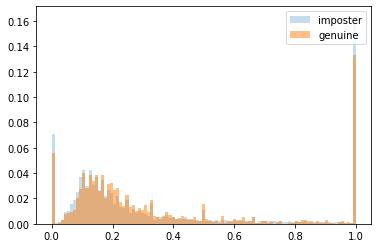

In [ ]:
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

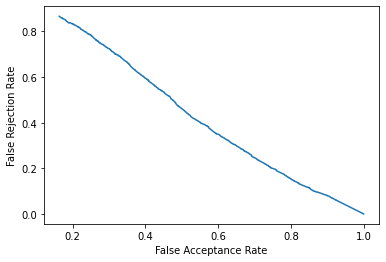

eer_diff= 0.0008341675008342042  eer_thresh= 0.2069


In [ ]:
scores_brisk = {}
crr_brisk = []
far_brisk = []
frr_brisk = []
eer_thresh_brisk = 1000
eer_diff_brisk = 1000
crrBrisk = 0
for thresh in threshes:
    scores_brisk[thresh] = calc_scores(thresh, genuine, imposter)
    crr_brisk.append(scores_brisk[thresh][0])
    far_brisk.append(scores_brisk[thresh][1])
    frr_brisk.append(scores_brisk[thresh][2])
    if(abs(scores_brisk[thresh][1]-scores_brisk[thresh][2])<eer_diff_brisk):
      eer_diff_brisk = abs(scores_brisk[thresh][1]-scores_brisk[thresh][2])
      eer_thresh_brisk = thresh
      crrBrisk = scores_brisk[thresh][0]
plt.plot(far_brisk, frr_brisk)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_brisk," eer_thresh=",eer_thresh_brisk)

In [ ]:
crrBrisk

0.5163198913198913

# SSIM

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim


In [ ]:
file1 = open("/content/drive/MyDrive/Colab Notebooks/output_ssim.csv", "w")
path1 = '/content/drive/MyDrive/Colab Notebooks/forehead_dataset/'

In [ ]:
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    if str1=='.ipynb_checkpoints':
        continue
    img1 = os.path.join(path1, images)
    img1 = cv2.imread(img1)
    img1 = img_enhance(img1)
    for image in natsorted(os.listdir(path1)):
        img2 = os.path.join(path1, image)
        str2 = str(image)
        if str1 == '.ipynb_checkpoints' or str2 == '.ipynb_checkpoints':
            continue
        if (str1.split("_")[2]==str2.split("_")[2]):
            continue
        if (img1 != img2):
            img2 = cv2.imread(img2)
            img2 = img_enhance(img2)
            img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
            (score, diff) = compare_ssim(img1, img2, full=True)
            diff = (diff * 255).astype("uint8")       
            file1.write(str1 + " " + str2 + " " + str(score)+"\n")
            print(str1 + " " + str2 + " " + str(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.14561757357216637
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.15197395276485967
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.14104814813444203
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.13005401938637734
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.1086969937586395
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.11274450495532835
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.1298320182457896
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.13436115853676828
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.11334533484382925
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.07876257178504055
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.06461765834415727
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.048035010803995824
26_P2_S1_1.jpg 9_P2_S2_2.jpg -0.0023178664725041205
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.02509623374754138
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.18415442333005944
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.15010948614884917
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.14369023526290714
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.16192451316611392
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.15822909073203514
26_P2_S1_1.

In [ ]:
file1.close()
genuine = []
imposter = []
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/output_ssim.csv", header=None)
for i in df[0]:
  print(i)
  str1 = i.split()
  a = str1[0].split("_") 
  b = str1[1].split("_")
  if (a[0]==b[0]):
    genuine.append(float(str1[2]))
  else:
    imposter.append(float(str1[2]))

Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.14561757357216637
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.15197395276485967
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.14104814813444203
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.13005401938637734
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.1086969937586395
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.11274450495532835
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.1298320182457896
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.13436115853676828
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.11334533484382925
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.07876257178504055
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.06461765834415727
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.048035010803995824
26_P2_S1_1.jpg 9_P2_S2_2.jpg -0.0023178664725041205
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.02509623374754138
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.18415442333005944
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.15010948614884917
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.14369023526290714
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.16192451316611392
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.15822909073203514
26_P2_S1_1.

In [ ]:
norm_gen = [(float(i)-min(genuine))/(max(genuine)-min(genuine)) for i in genuine]
norm_imp = [(float(i)-min(imposter))/(max(imposter)-min(imposter)) for i in imposter]

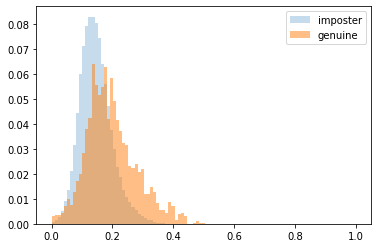

In [ ]:
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
pyplot.show()

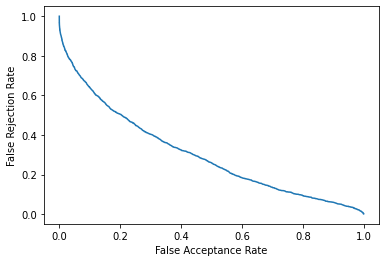

eer_diff= 0.0005695179306290377  eer_thresh= 0.1588


In [ ]:
scores_ssim = {}
crr_ssim = []
far_ssim = []
frr_ssim = []
eer_thresh_ssim = 1000
eer_diff_ssim = 1000
crrSsim = 0
for thresh in threshes:
    scores_ssim[thresh] = calc_scores(thresh, genuine, imposter)
    crr_ssim.append(scores_ssim[thresh][0])
    far_ssim.append(scores_ssim[thresh][1])
    frr_ssim.append(scores_ssim[thresh][2])
    if(abs(scores_ssim[thresh][1]-scores_ssim[thresh][2])<eer_diff_ssim):
      eer_diff_ssim = abs(scores_ssim[thresh][1]-scores_ssim[thresh][2])
      eer_thresh_ssim = thresh
      crrSsim = scores_ssim[thresh][0]
plt.plot(far_ssim, frr_ssim)
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
print("eer_diff=",eer_diff_ssim," eer_thresh=",eer_thresh_ssim)

In [ ]:
crrSsim

0.6439023526077098

# Combined ROC curve

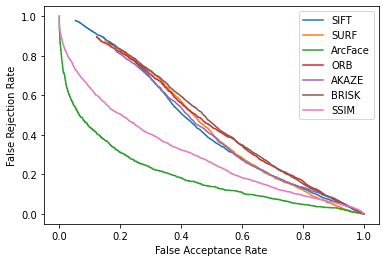

In [ ]:
plt.plot(far_sift,frr_sift, label="SIFT")
plt.plot(far_surf,frr_surf, label="SURF")
plt.plot(far_arc,frr_arc, label="ArcFace")
plt.plot(far_orb,frr_orb, label="ORB")
plt.plot(far_akaze,frr_akaze, label="AKAZE")
plt.plot(far_brisk,frr_brisk, label="BRISK")
plt.plot(far_ssim,frr_ssim, label="SSIM")
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.legend(loc='upper right')